In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from olist.product import Product
from olist.seller import Seller
from olist.order import Order
from olist.data import Olist

%load_ext autoreload
%autoreload 2

# Product Cat

In [21]:
product = Product()

products = product.get_training_data()
products.head(5)

In [12]:
columns = list(products.select_dtypes(exclude=['object']).columns)

In [16]:
agg = "mean"
agg_params = dict(zip(columns, [agg] * len(columns)))

In [17]:
agg_params['quantity'] = 'sum'

In [19]:
agg_params

{'product_name_length': 'mean',
 'product_description_length': 'mean',
 'product_photos_qty': 'mean',
 'product_weight_g': 'mean',
 'product_length_cm': 'mean',
 'product_height_cm': 'mean',
 'product_width_cm': 'mean',
 'wait_time': 'mean',
 'price': 'mean',
 'share_of_one_stars': 'mean',
 'share_of_five_stars': 'mean',
 'review_score': 'mean',
 'n_orders': 'mean',
 'quantity': 'sum',
 'sales': 'mean'}

In [20]:
product_cat = products.groupby('quantity').agg(agg_params)

# Seller - Cost of Review

In [29]:
order = Order()
data = Olist()

In [25]:
order_reviews = order.get_review_score()

In [31]:
order_sellers = data.get_data()['order_items'][['order_id', 'seller_id']].drop_duplicates()

In [33]:
order_reviews

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [34]:
df = order_sellers.merge(order_reviews, on='order_id')

In [41]:
df['cost_of_review'] = df.review_score.map({1: 100,
                                            2: 50,
                                            3: 40,
                                            4: 0,
                                            5: 0})

In [44]:
result = df.groupby('seller_id', as_index=False).agg(
            {'dim_is_five_star': 'mean',
            'dim_is_one_star': 'mean',
            'review_score': 'mean',
            'cost_of_review': 'sum'})

result.columns = ['seller_id', 'share_of_five_stars', 'share_of_one_stars', 'review_score', 'cost_of_review']

In [45]:
result

,seller_id,share_of_five_stars,share_of_one_stars,review_score,cost_of_review
0,0015a82c2db000af6aaaf3ae2ecb0532,0.666667,0.333333,3.666667,100
1,001cca7ae9ae17fb1caed9dfb1094831,0.527919,0.121827,3.984772,3560
2,001e6ad469a905060d959994f1b41e4f,0.000000,1.000000,1.000000,100
3,002100f778ceb8431b7a1020ff7ab48f,0.519231,0.134615,3.903846,1110
4,003554e2dce176b5555353e4f3555ac8,1.000000,0.000000,5.000000,0
...,...,...,...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,0.000000,1.000000,1.000000,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.666667,0.055556,4.333333,190
3087,ffeee66ac5d5a62fe688b9d26f83f534,0.642857,0.142857,4.214286,200
3088,fffd5413c0700ac820c7069d66d98c89,0.542373,0.186441,3.847458,1360


# Seller - IT costs

In [3]:
seller = Seller()

In [4]:
sellers = seller.get_training_data()

In [5]:
sellers

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_five_stars,share_of_one_stars,review_score,cost_of_review,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.725000,0.050000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1.000000,0.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1.000000,0.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,0.000000,1.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,1.000000,0.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.500000,0.100000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,1.000000,0.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.500000,0.000000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [6]:
sorted_sellers = sellers.sort_values(by='profits')[['profits', 'n_orders', 'revenues']].reset_index()

In [8]:
sorted_sellers.head()

,index,profits,n_orders,revenues
0,769,-21519.517,1854,13770.483
1,2358,-17752.708,1806,21647.292
2,1357,-17581.158,1706,11948.842
3,945,-15542.248,1146,4677.752
4,315,-12886.431,943,2553.569


Text(0.5, 0, 'seller id')

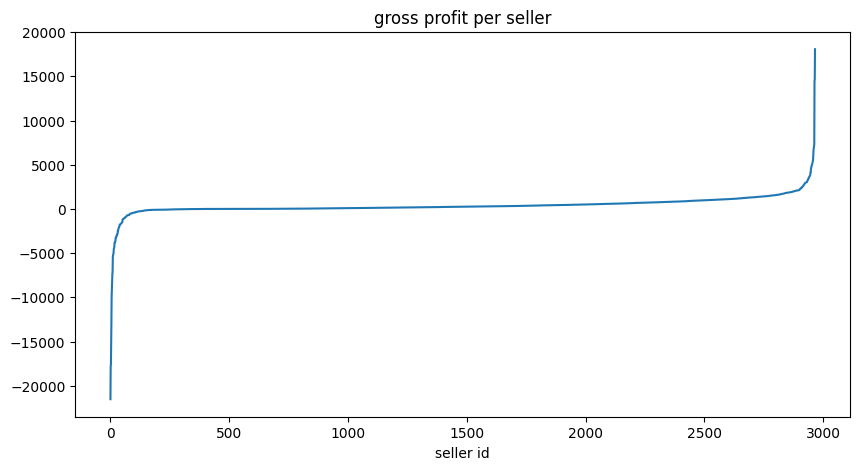

In [14]:
plt.figure(figsize=(10,5))
sorted_sellers.profits.plot()
plt.title("gross profit per seller")
plt.xlabel('seller id')